# 1. Import thư viện

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchsummary import summary
from torch.utils.data import DataLoader, Dataset
import cv2
import numpy as np
import os
from PIL import Image
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from models.hqsr import *

In [2]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:128'
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 2. Tạo Mô hình SR

In [3]:
class ImageDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, scale, valid = False):
        self.lr_files = sorted(os.listdir(lr_dir))
        self.hr_files = sorted(os.listdir(hr_dir))
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.scale = scale
        self.valid = valid

    def __len__(self):
        return len(self.lr_files)

    def __getitem__(self, idx):
        lr_image = Image.open(os.path.join(self.lr_dir, self.lr_files[idx])).convert('RGB')
        hr_image = Image.open(os.path.join(self.hr_dir, self.hr_files[idx])).convert('RGB')
    
        w, h= hr_image.size
        if self.valid:
            lr_image = lr_image.resize((w//self.scale, h//self.scale))
        transform = transforms.Compose([
            transforms.ToTensor()
        ])
        
        lr_image = transform(lr_image)
        hr_image = transform(hr_image)
        return lr_image, hr_image

# 3. Tạo Hyperparameter

In [4]:
# Đường dẫn tới bộ dữ liệu

# test_hr_dir  = '/kaggle/input/srdataset/sr_data/test/HR'
# test_lr_dir  = '/kaggle/input/srdataset/sr_data/test/LR'

# print(torch.cuda.memory_allocated())
# print(torch.cuda.memory_reserved())

In [5]:
import os
os.environ["TORCH_USE_CUDA_DSA"] = "1"
os.environ["CUDA_LAUNCH_BLOCKING"]="1"

In [6]:
def calculate_psnr(img1, img2):
    mse = torch.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    psnr = 20 * torch.log10(max_pixel / torch.sqrt(mse))
    return psnr.item()

# 4. Training

Validation Epoch 1/24: 100%|██████████| 10/10 [00:03<00:00,  3.12batch/s]


Epoch 1/24, Loss sobel: 0.0032, Loss canny: 0.0033, Time training: 1637.5709s, PSNR sobel: 25.36 dB, PSNR canny: 25.36 dB, Val PSNR sobel: 26.71 dB, Val PSNR canny: 26.69 dB
Saved Sobel SR model with PSNR 26.7147
Saved Canny SR model with PSNR 26.6907


Validation Epoch 2/24: 100%|██████████| 10/10 [00:03<00:00,  3.14batch/s]


Epoch 2/24, Loss sobel: 0.0027, Loss canny: 0.0027, Time training: 1621.1039s, PSNR sobel: 25.96 dB, PSNR canny: 25.95 dB, Val PSNR sobel: 27.13 dB, Val PSNR canny: 27.12 dB
Saved Sobel SR model with PSNR 27.1331
Saved Canny SR model with PSNR 27.1172


Validation Epoch 3/24: 100%|██████████| 10/10 [00:03<00:00,  3.14batch/s]


Epoch 3/24, Loss sobel: 0.0026, Loss canny: 0.0026, Time training: 1598.1309s, PSNR sobel: 26.14 dB, PSNR canny: 26.13 dB, Val PSNR sobel: 27.34 dB, Val PSNR canny: 27.30 dB
Saved Sobel SR model with PSNR 27.3399
Saved Canny SR model with PSNR 27.2959


Validation Epoch 4/24: 100%|██████████| 10/10 [00:03<00:00,  3.20batch/s]


Epoch 4/24, Loss sobel: 0.0025, Loss canny: 0.0025, Time training: 1594.8152s, PSNR sobel: 26.24 dB, PSNR canny: 26.23 dB, Val PSNR sobel: 27.47 dB, Val PSNR canny: 27.47 dB
Saved Sobel SR model with PSNR 27.4716
Saved Canny SR model with PSNR 27.4743


Validation Epoch 5/24: 100%|██████████| 10/10 [00:03<00:00,  3.17batch/s]


Epoch 5/24, Loss sobel: 0.0025, Loss canny: 0.0025, Time training: 1595.7623s, PSNR sobel: 26.32 dB, PSNR canny: 26.31 dB, Val PSNR sobel: 27.53 dB, Val PSNR canny: 27.54 dB
Saved Sobel SR model with PSNR 27.5340
Saved Canny SR model with PSNR 27.5409


Validation Epoch 6/24: 100%|██████████| 10/10 [00:03<00:00,  3.20batch/s]


Epoch 6/24, Loss sobel: 0.0025, Loss canny: 0.0025, Time training: 1596.9128s, PSNR sobel: 26.37 dB, PSNR canny: 26.37 dB, Val PSNR sobel: 27.54 dB, Val PSNR canny: 27.54 dB
Saved Sobel SR model with PSNR 27.5390
Saved Canny SR model with PSNR 27.5430


Validation Epoch 7/24: 100%|██████████| 10/10 [00:03<00:00,  3.18batch/s]


Epoch 7/24, Loss sobel: 0.0024, Loss canny: 0.0024, Time training: 1605.5331s, PSNR sobel: 26.42 dB, PSNR canny: 26.41 dB, Val PSNR sobel: 27.63 dB, Val PSNR canny: 27.63 dB
Saved Sobel SR model with PSNR 27.6252
Saved Canny SR model with PSNR 27.6308


Validation Epoch 8/24: 100%|██████████| 10/10 [00:03<00:00,  3.20batch/s]


Epoch 8/24, Loss sobel: 0.0024, Loss canny: 0.0024, Time training: 1601.9947s, PSNR sobel: 26.45 dB, PSNR canny: 26.45 dB, Val PSNR sobel: 27.63 dB, Val PSNR canny: 27.62 dB
Saved Sobel SR model with PSNR 27.6273


Validation Epoch 9/24: 100%|██████████| 10/10 [00:03<00:00,  3.20batch/s]


Epoch 9/24, Loss sobel: 0.0024, Loss canny: 0.0024, Time training: 1597.4186s, PSNR sobel: 26.52 dB, PSNR canny: 26.51 dB, Val PSNR sobel: 27.70 dB, Val PSNR canny: 27.69 dB
Saved Sobel SR model with PSNR 27.7017
Saved Canny SR model with PSNR 27.6921


Validation Epoch 10/24: 100%|██████████| 10/10 [00:03<00:00,  3.19batch/s]


Epoch 10/24, Loss sobel: 0.0024, Loss canny: 0.0024, Time training: 1599.1608s, PSNR sobel: 26.54 dB, PSNR canny: 26.53 dB, Val PSNR sobel: 27.72 dB, Val PSNR canny: 27.72 dB
Saved Sobel SR model with PSNR 27.7227
Saved Canny SR model with PSNR 27.7154


Validation Epoch 11/24: 100%|██████████| 10/10 [00:03<00:00,  3.17batch/s]


Epoch 11/24, Loss sobel: 0.0024, Loss canny: 0.0024, Time training: 1602.6626s, PSNR sobel: 26.56 dB, PSNR canny: 26.56 dB, Val PSNR sobel: 27.72 dB, Val PSNR canny: 27.72 dB
Saved Canny SR model with PSNR 27.7176


Validation Epoch 12/24: 100%|██████████| 10/10 [00:03<00:00,  3.20batch/s]


Epoch 12/24, Loss sobel: 0.0024, Loss canny: 0.0024, Time training: 1599.1521s, PSNR sobel: 26.57 dB, PSNR canny: 26.57 dB, Val PSNR sobel: 27.69 dB, Val PSNR canny: 27.71 dB


Validation Epoch 13/24: 100%|██████████| 10/10 [00:03<00:00,  3.18batch/s]


Epoch 13/24, Loss sobel: 0.0024, Loss canny: 0.0024, Time training: 1596.8799s, PSNR sobel: 26.58 dB, PSNR canny: 26.57 dB, Val PSNR sobel: 27.73 dB, Val PSNR canny: 27.71 dB
Saved Sobel SR model with PSNR 27.7298


Validation Epoch 14/24: 100%|██████████| 10/10 [00:03<00:00,  3.19batch/s]


Epoch 14/24, Loss sobel: 0.0024, Loss canny: 0.0024, Time training: 1600.0902s, PSNR sobel: 26.58 dB, PSNR canny: 26.58 dB, Val PSNR sobel: 27.75 dB, Val PSNR canny: 27.75 dB
Saved Sobel SR model with PSNR 27.7514
Saved Canny SR model with PSNR 27.7488


Validation Epoch 15/24: 100%|██████████| 10/10 [00:03<00:00,  3.21batch/s]


Epoch 15/24, Loss sobel: 0.0023, Loss canny: 0.0023, Time training: 1605.8305s, PSNR sobel: 26.59 dB, PSNR canny: 26.59 dB, Val PSNR sobel: 27.74 dB, Val PSNR canny: 27.75 dB
Saved Canny SR model with PSNR 27.7550


Validation Epoch 16/24: 100%|██████████| 10/10 [00:03<00:00,  3.18batch/s]


Epoch 16/24, Loss sobel: 0.0023, Loss canny: 0.0023, Time training: 1600.3770s, PSNR sobel: 26.61 dB, PSNR canny: 26.61 dB, Val PSNR sobel: 27.75 dB, Val PSNR canny: 27.75 dB


Validation Epoch 17/24: 100%|██████████| 10/10 [00:03<00:00,  3.15batch/s]


Epoch 17/24, Loss sobel: 0.0023, Loss canny: 0.0023, Time training: 1603.8034s, PSNR sobel: 26.64 dB, PSNR canny: 26.64 dB, Val PSNR sobel: 27.79 dB, Val PSNR canny: 27.78 dB
Saved Sobel SR model with PSNR 27.7891
Saved Canny SR model with PSNR 27.7762


Validation Epoch 18/24: 100%|██████████| 10/10 [00:03<00:00,  3.21batch/s]


Epoch 18/24, Loss sobel: 0.0023, Loss canny: 0.0023, Time training: 1608.0144s, PSNR sobel: 26.64 dB, PSNR canny: 26.64 dB, Val PSNR sobel: 27.78 dB, Val PSNR canny: 27.76 dB


Validation Epoch 19/24: 100%|██████████| 10/10 [00:03<00:00,  3.21batch/s]


Epoch 19/24, Loss sobel: 0.0023, Loss canny: 0.0023, Time training: 1608.9960s, PSNR sobel: 26.65 dB, PSNR canny: 26.64 dB, Val PSNR sobel: 27.78 dB, Val PSNR canny: 27.77 dB


Validation Epoch 20/24: 100%|██████████| 10/10 [00:03<00:00,  3.21batch/s]


Epoch 20/24, Loss sobel: 0.0023, Loss canny: 0.0023, Time training: 1605.0108s, PSNR sobel: 26.66 dB, PSNR canny: 26.65 dB, Val PSNR sobel: 27.77 dB, Val PSNR canny: 27.76 dB


Validation Epoch 21/24: 100%|██████████| 10/10 [00:03<00:00,  3.21batch/s]


Epoch 21/24, Loss sobel: 0.0023, Loss canny: 0.0023, Time training: 1605.6037s, PSNR sobel: 26.66 dB, PSNR canny: 26.66 dB, Val PSNR sobel: 27.78 dB, Val PSNR canny: 27.77 dB


Validation Epoch 22/24: 100%|██████████| 10/10 [00:03<00:00,  3.15batch/s]


Epoch 22/24, Loss sobel: 0.0023, Loss canny: 0.0023, Time training: 1605.8990s, PSNR sobel: 26.67 dB, PSNR canny: 26.67 dB, Val PSNR sobel: 27.76 dB, Val PSNR canny: 27.75 dB
PSNR did not improve for 50 epochs. Early stopping at epoch 22


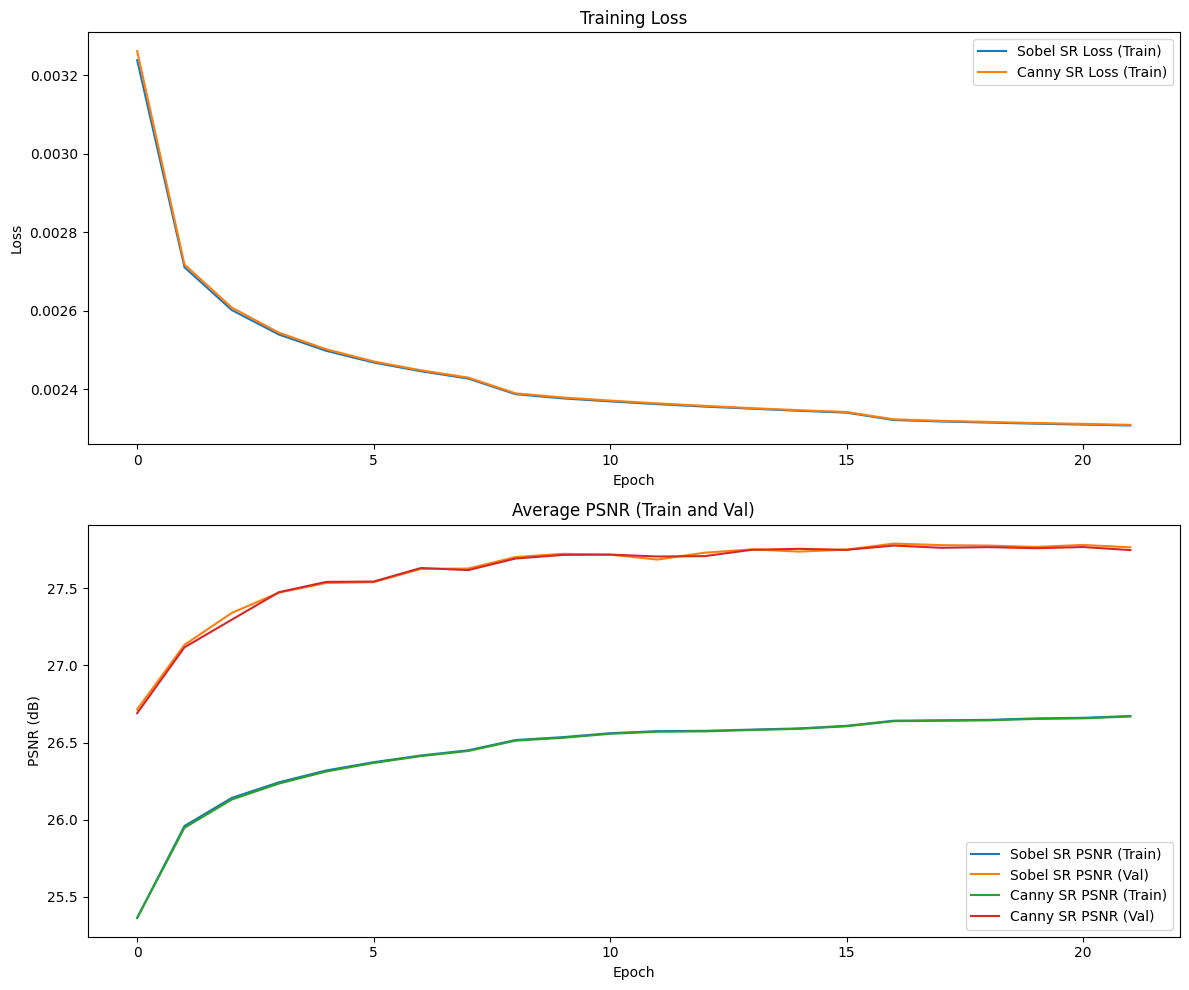

In [7]:
from torch.amp import autocast, GradScaler
from torchsummary import summary
scaler = GradScaler()

# Khởi tạo dataset và dataloader
# for scale in [2, 3, 4]:
scale = 4
train_lr_dir = f'dataset/Train/LR_{scale}'
train_hr_dir = 'dataset/Train/HR'
valid_lr_dir = 'dataset/Test/HR'
valid_hr_dir = 'dataset/Test/HR'
train_dataset = ImageDataset(train_lr_dir, train_hr_dir, scale=scale)
train_loader = DataLoader(train_dataset, batch_size = 16, shuffle=True)

valid_dataset = ImageDataset(valid_lr_dir, valid_hr_dir, scale=scale, valid=True)
valid_loader = DataLoader(valid_dataset)

# print(len(train_loader))
# Khởi tạo mô hình, loss function và optimizer
torch.cuda.empty_cache()

sobelsr = HQSR(scale_factor = scale, use_sobel = True).to(device)
# sobelsr.load_state_dict(torch.load('weight/best_sobel_srx4_model.pth', map_location=device))
criterion = nn.MSELoss()
optim_sobel = optim.Adam(sobelsr.parameters(), lr=1e-4,betas =(0.9, 0.999))
scheduler_sobel = optim.lr_scheduler.StepLR(optim_sobel, step_size=10**5, gamma=0.5)
# summary(sobelsr.cuda(), input_size=(3, 510, 339), device='cuda')
cannysr = HQSR(scale_factor = scale, use_canny = True).to(device)
# cannysr = nn.DataParallel(cannysr).to(device)
# cannysr.load_state_dict(torch.load('weight/best_canny_srx4_model.pth', map_location=device))

optim_canny = optim.Adam(cannysr.parameters(), lr=1e-4,betas =(0.9, 0.999))
scheduler_canny = optim.lr_scheduler.StepLR(optim_canny, step_size=10**5, gamma=0.5)
num_epochs = 24

best_psnr_sobel = float('-inf')
best_psnr_canny = float('-inf')
torch.cuda.empty_cache()

losses_sobel = []
losses_canny = []
avg_psnr_sobel = []
avg_psnr_canny = []

val_avg_psnr_sobel = []  # Validation PSNR
val_avg_psnr_canny = []

patience = 5
epochs_no_improve = 0
log_file = open('outputs/train_log/hqsr.txt', 'a')
scaler = GradScaler()

for epoch in range(num_epochs):
    sobelsr.train()
    cannysr.train()

    epoch_loss_sobel = 0
    psnr_values_sobel = 0
    epoch_loss_canny = 0
    psnr_values_canny = 0
    start_time = time.time()

    # Training loop
    for (lr_images, hr_images) in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
        lr_images = lr_images.cuda()
        hr_images = hr_images.cuda()

        # Sobel SR training
        optim_sobel.zero_grad()  
        with autocast(device_type='cuda'):
            outputs_sobel = sobelsr(lr_images)
            loss_sobel = criterion(outputs_sobel, hr_images)
        psnr_sobel = calculate_psnr(outputs_sobel, hr_images)
            
        scaler.scale(loss_sobel).backward()
        scaler.step(optim_sobel)
        scaler.update()
        scheduler_sobel.step()

        # Canny SR training
        optim_canny.zero_grad()  
        with autocast(device_type='cuda'):
            outputs_canny = cannysr(lr_images)
            loss_canny = criterion(outputs_canny, hr_images)
        psnr_canny = calculate_psnr(outputs_canny, hr_images)

        scaler.scale(loss_canny).backward()
        scaler.step(optim_canny)
        scaler.update()
        scheduler_canny.step()
        
        # Update metrics
        epoch_loss_sobel += loss_sobel.item()
        psnr_values_sobel += psnr_sobel
        epoch_loss_canny += loss_canny.item()
        psnr_values_canny += psnr_canny

    # Calculate average training metrics
    avg_epoch_loss_sobel = epoch_loss_sobel / len(train_loader)
    average_psnr_sobel = psnr_values_sobel / len(train_loader)
    losses_sobel.append(avg_epoch_loss_sobel)
    avg_psnr_sobel.append(average_psnr_sobel)

    avg_epoch_loss_canny = epoch_loss_canny / len(train_loader)
    average_psnr_canny = psnr_values_canny / len(train_loader)
    losses_canny.append(avg_epoch_loss_canny)
    avg_psnr_canny.append(average_psnr_canny)

    # Validation step
    sobelsr.eval()
    cannysr.eval()

    val_psnr_values_sobel = 0
    val_psnr_values_canny = 0

    with torch.no_grad():  # No gradients during validation
        for (lr_images, hr_images) in tqdm(valid_loader, desc=f'Validation Epoch {epoch+1}/{num_epochs}', unit='batch'):
            lr_images = lr_images.cuda()
            hr_images = hr_images.cuda()

            # Sobel SR validation (no loss, only PSNR)
            outputs_sobel = sobelsr(lr_images)
            psnr_sobel = calculate_psnr(outputs_sobel, hr_images)

            # Canny SR validation (no loss, only PSNR)
            outputs_canny = cannysr(lr_images)
            psnr_canny = calculate_psnr(outputs_canny, hr_images)

            # Update validation PSNR
            val_psnr_values_sobel += psnr_sobel
            val_psnr_values_canny += psnr_canny

    # Calculate average validation PSNR
    val_average_psnr_sobel = val_psnr_values_sobel / len(valid_loader)
    val_avg_psnr_sobel.append(val_average_psnr_sobel)

    val_average_psnr_canny = val_psnr_values_canny / len(valid_loader)
    val_avg_psnr_canny.append(val_average_psnr_canny)

    end_time = time.time()

    # Logging results
    log_string = (f"Epoch {epoch+1}/{num_epochs}, Loss sobel: {avg_epoch_loss_sobel:.4f}, "
                f"Loss canny: {avg_epoch_loss_canny:.4f}, Time training: {end_time - start_time:.4f}s, "
                f"PSNR sobel: {average_psnr_sobel:.2f} dB, PSNR canny: {average_psnr_canny:.2f} dB, "
                f"Val PSNR sobel: {val_average_psnr_sobel:.2f} dB, Val PSNR canny: {val_average_psnr_canny:.2f} dB")
    print(log_string)
    log_file.write(log_string + '\n')
    log_file.flush()

    # Save best models based on validation PSNR
    if val_average_psnr_sobel > best_psnr_sobel:
        best_psnr_sobel = val_average_psnr_sobel
        torch.save(sobelsr.state_dict(), f'outputs/weight_sr/best_hqsr_sobel.pth')
        print(f"Saved Sobel SR model with PSNR {best_psnr_sobel:.4f}")
        epochs_no_improve=0
    

    if val_average_psnr_canny > best_psnr_canny:
        best_psnr_canny = val_average_psnr_canny
        torch.save(cannysr.state_dict(), f'outputs/weight_sr/best_hqsr_canny.pth')
        print(f"Saved Canny SR model with PSNR {best_psnr_canny:.4f}")
        epochs_no_improve=0
    
    if (val_average_psnr_sobel < best_psnr_sobel) and (val_average_psnr_canny < best_psnr_canny):
        epochs_no_improve+=1
    if epochs_no_improve >= patience:
        print(f"PSNR did not improve for 50 epochs. Early stopping at epoch {epoch+1}")
        break
    # Clear cache and optionally save models at each epoch
    save_dir = f'outputs/path/x{scale}'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    torch.save(sobelsr.state_dict(), os.path.join(save_dir, f'hqsr_sobel_{epoch}.pth'))
    torch.save(cannysr.state_dict(), os.path.join(save_dir, f'hqsr_canny_{epoch}.pth'))
        # Close log file after training
log_file.close()

# Plotting results
plt.figure(figsize=(12, 10))

# Plot loss
plt.subplot(2, 1, 1)
plt.plot(losses_sobel, label='Sobel SR Loss (Train)')
plt.plot(losses_canny, label='Canny SR Loss (Train)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

# Plot PSNR
plt.subplot(2, 1, 2)
plt.plot(avg_psnr_sobel, label='Sobel SR PSNR (Train)')
plt.plot(val_avg_psnr_sobel, label='Sobel SR PSNR (Val)')
plt.plot(avg_psnr_canny, label='Canny SR PSNR (Train)')
plt.plot(val_avg_psnr_canny, label='Canny SR PSNR (Val)')
plt.xlabel('Epoch')
plt.ylabel('PSNR (dB)')
plt.legend()
plt.title('Average PSNR (Train and Val)')

plt.tight_layout()
plt.show()

# 5. Testing

In [8]:
cannysr = cannysr.cpu()
sobelsr = sobelsr.cpu()
sobelsr.eval()
cannysr.eval()

val_psnr_values_sobel = 0
val_psnr_values_canny = 0
torch.cuda.empty_cache()
with torch.no_grad():  # No gradients during validation
        for (lr_images, hr_images) in tqdm(valid_loader, desc=f'Validation Epoch {epoch+1}/{num_epochs}', unit='batch'):
                lr_images = lr_images.cpu()
                hr_images = hr_images.cpu()

                # Sobel SR validation (no loss, only PSNR)
                outputs_sobel = sobelsr(lr_images)
                psnr_sobel = calculate_psnr(outputs_sobel, hr_images)

                # Canny SR validation (no loss, only PSNR)
                outputs_canny = cannysr(lr_images)
                psnr_canny = calculate_psnr(outputs_canny, hr_images)

                # Update validation PSNR
                val_psnr_values_sobel += psnr_sobel
                val_psnr_values_canny += psnr_canny

        # Calculate average validation PSNR
        val_average_psnr_sobel = val_psnr_values_sobel / len(valid_loader)

        val_average_psnr_canny = val_psnr_values_canny / len(valid_loader)
        print(val_average_psnr_canny, val_average_psnr_sobel)

Validation Epoch 22/24: 100%|██████████| 10/10 [00:48<00:00,  4.89s/batch]

27.746776008605956 27.764484024047853


In [9]:
cannysr = cannysr.cpu()
sobelsr = sobelsr.cpu()
sobelsr.eval()
cannysr.eval()

val_psnr_values_sobel = 0
val_psnr_values_canny = 0
torch.cuda.empty_cache()
with torch.no_grad():  # No gradients during validation
        for (lr_images, hr_images) in tqdm(valid_loader, desc=f'Validation Epoch {epoch+1}/{num_epochs}', unit='batch'):
                lr_images = lr_images.cpu()
                hr_images = hr_images.cpu()

                # Sobel SR validation (no loss, only PSNR)
                outputs_sobel = sobelsr(lr_images)
                psnr_sobel = calculate_psnr(outputs_sobel, hr_images)

                # Canny SR validation (no loss, only PSNR)
                outputs_canny = cannysr(lr_images)
                psnr_canny = calculate_psnr(outputs_canny, hr_images)

                # Update validation PSNR
                val_psnr_values_sobel += psnr_sobel
                val_psnr_values_canny += psnr_canny

        # Calculate average validation PSNR
        val_average_psnr_sobel = val_psnr_values_sobel / len(valid_loader)

        val_average_psnr_canny = val_psnr_values_canny / len(valid_loader)
        print(val_average_psnr_canny, val_average_psnr_sobel)

Validation Epoch 22/24: 100%|██████████| 10/10 [00:49<00:00,  4.98s/batch]

27.746776008605956 27.764484024047853
